## Box Filter

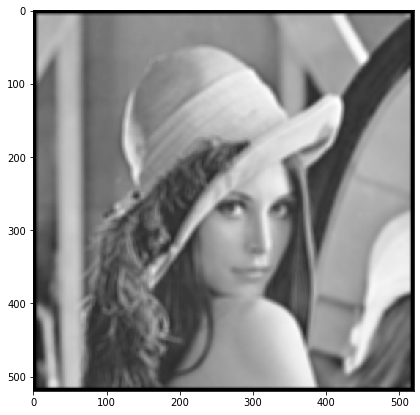

In [194]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray
from scipy import signal
import math

def boxFilter(img, n):
    
    if n%2 == 0:
        n += 1
        
    img = np.pad(img, pad_width = int(n/2), mode='constant', constant_values = 0)
    img_out = img.copy()
    
    height = img.shape[0]
    width = img.shape[1]

    for i in np.arange(int(n/2), height-int(n/2)):
        for j in np.arange(int(n/2), width-int(n/2)):        
            sum = 0
            for k in np.arange(-(int(n/2)), int(n/2)):
                for l in np.arange(-(int(n/2)), int(n/2)):
                    a = img.item(i+k, j+l)
                    sum = sum + a
            b = float(sum / (n * n))
            img_out.itemset((i,j), b)
    
    fig1 = plt.figure(figsize = (7,7))
    plt.imshow(img_out, cmap='gray')

img_path = 'lena.png'
img = io.imread(img_path)
img = rgb2gray(img)    
boxFilter(img, 8)

## Median Filter

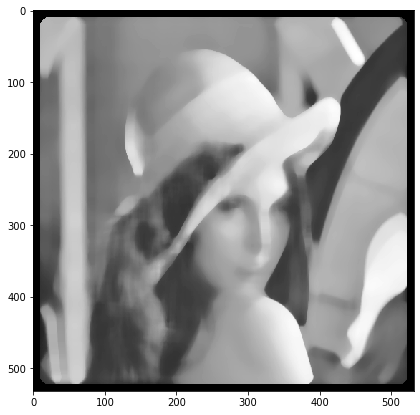

In [199]:
def medianFilter(img, n):
    
    if n%2 == 0:
        n += 1
    
    img = np.pad(img, pad_width = int(n/2), mode='constant', constant_values = 0)
    img_out = img.copy()
    
    height = img.shape[0]
    width = img.shape[1]
    index = int((((n*n) + 1)/2) - 1)

    for i in np.arange(int(n/2), height-int(n/2)):
        for j in np.arange(int(n/2), width-int(n/2)):        
            neighbours = []
            for k in np.arange(-(int(n/2)), int(n/2)):
                for l in np.arange(-(int(n/2)), int(n/2)):
                    a = img.item(i+k, j+l)
                    neighbours.append(a)
            neighbours.sort()
            median = neighbours[index]
            b = median
            img_out.itemset((i,j), b)
    
    fig1 = plt.figure(figsize = (7,7))
    plt.imshow(img_out, cmap='gray')
  
medianFilter(img, 20)

## Convolution

In [196]:
def convolution(image, gfilter):
    
    imageRow = image.shape[0]
    imageColumn = image.shape[1]
    gfilterRow = gfilter.shape[0]
    gfilterColumn = gfilter.shape[1]
    
    imageOut = np.zeros(image.shape)
    
    pad_height = int((gfilterRow - 1) / 2)
    pad_width = int((gfilterColumn - 1) / 2)
 
    padded_image = np.zeros((imageRow + (2 * pad_height), imageColumn + (2 * pad_width)))
 
    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = image
    
    for row in range(imageRow):
        for col in range(imageColumn):
            imageOut[row, col] = np.sum(gfilter * padded_image[row:row + gfilterRow, col:col + gfilterColumn])
    
    return imageOut

## Gaussian Filter

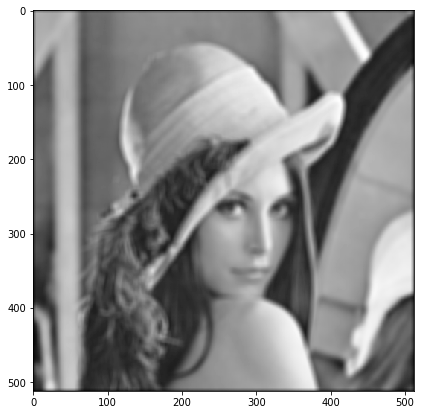

In [197]:
def gaussFunction(x, u, sd):
    return 1 / (np.sqrt(2 * np.pi) * sd) * np.e ** (-np.power((x - u) / sd, 2) / 2)

def createGaussianFilter(n, sigma):
    if n%2 == 0:
        n += 1
    
    filter1D = np.linspace(-(int(n/2)), int(n/2), n)
    for i in range(n):
        filter1D[i] = gaussFunction(filter1D[i], 0, sigma)
    filter2D = np.outer(filter1D.T, filter1D.T)
    filter2D*= 1.0 / filter2D.max()
    
    return filter2D



def gaussianFilter(image, n, sigma):
    
    gaussianFilter = createGaussianFilter(n, sigma)
    filteredImage = convolution(image, gaussianFilter)
    
    fig1 = plt.figure(figsize = (7,7))
    plt.imshow(filteredImage, cmap='gray')

gaussianFilter(img, 8, 10)

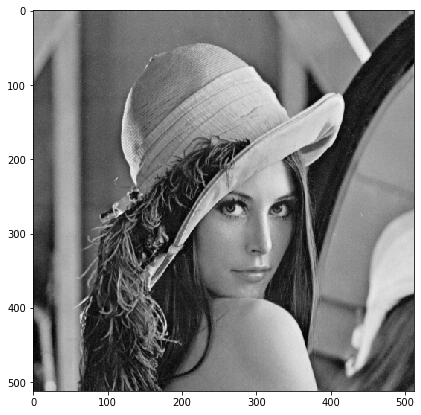

In [30]:
sigma = 0.9
imgNoise = img + sigma*np.random.randn(*img.shape)
fig1 = plt.figure(figsize = (7,7))
plt.imshow(imgNoise, cmap='gray')

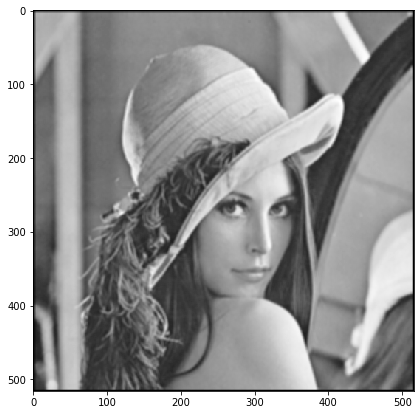

In [32]:
boxFilter(imgNoise, 5)

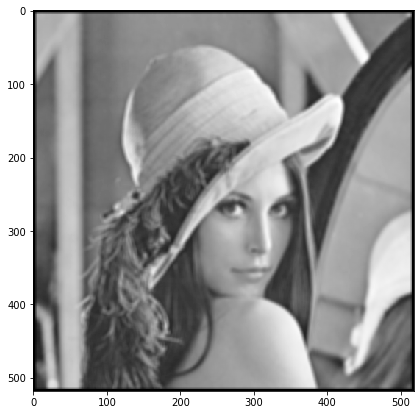

In [33]:
boxFilter(imgNoise, 7)

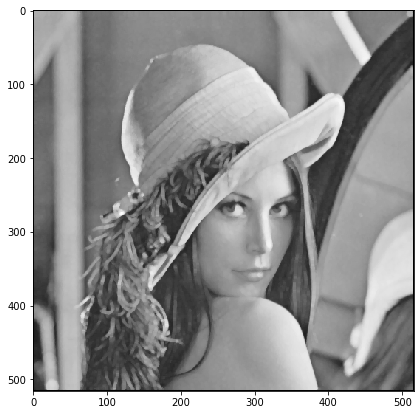

In [40]:
medianFilter(imgNoise, 5)

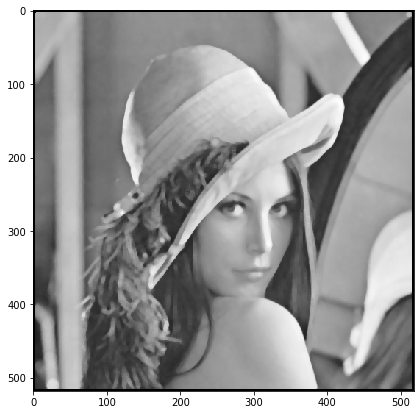

In [41]:
medianFilter(imgNoise, 7)

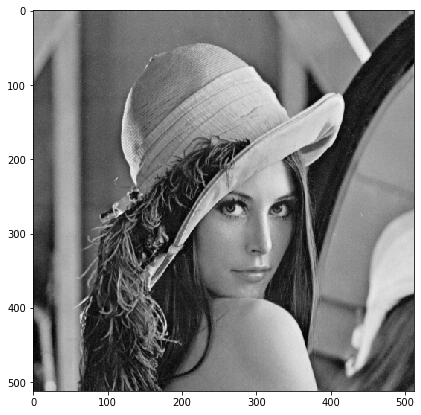

In [42]:
gaussianFilter(imgNoise, 5, 0.1)

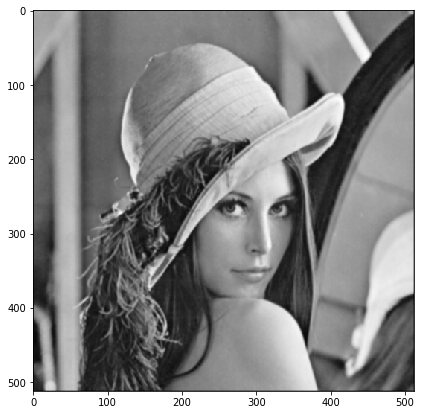

In [43]:
gaussianFilter(imgNoise, 5, 0.9)

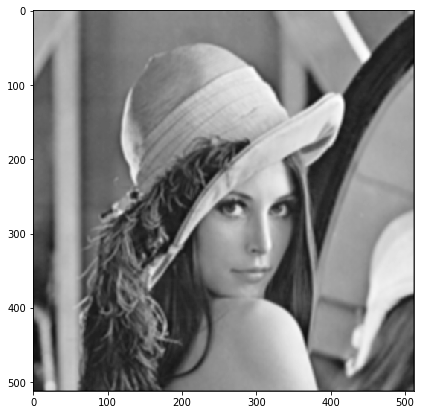

In [44]:
gaussianFilter(imgNoise, 5, 2.5)

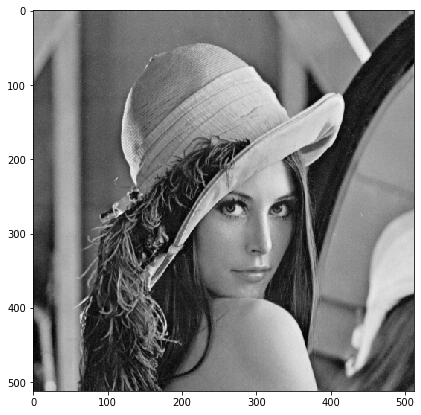

In [45]:
gaussianFilter(imgNoise, 7, 0.1)

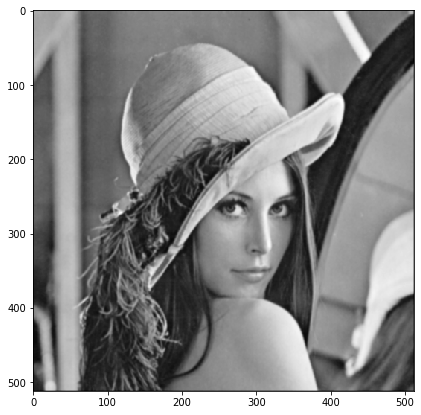

In [46]:
gaussianFilter(imgNoise, 7, 0.9)

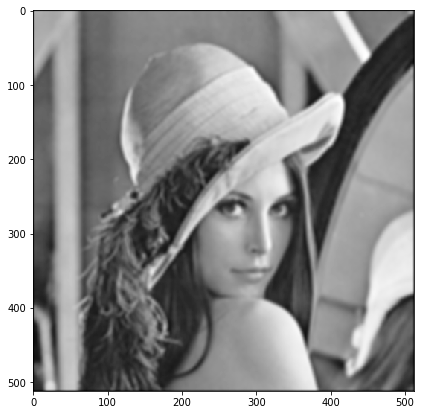

In [47]:
gaussianFilter(imgNoise, 7, 2.5)

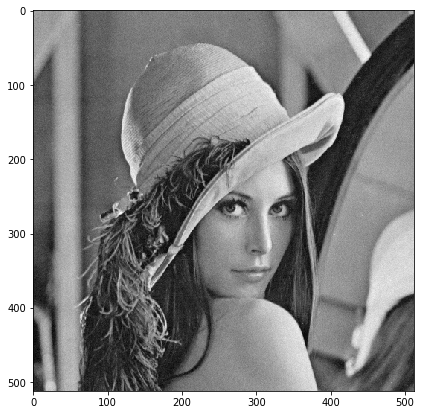

In [50]:
sigma = 4.5
imgNoise = img + sigma*np.random.randn(*img.shape)
fig1 = plt.figure(figsize = (7,7))
plt.imshow(imgNoise, cmap='gray')

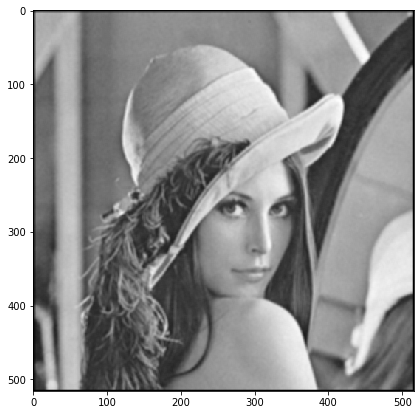

In [51]:
boxFilter(imgNoise, 5)

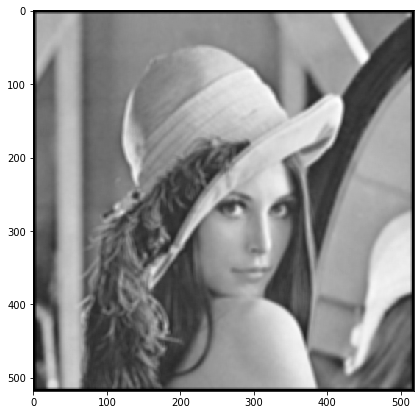

In [52]:
boxFilter(imgNoise, 7)

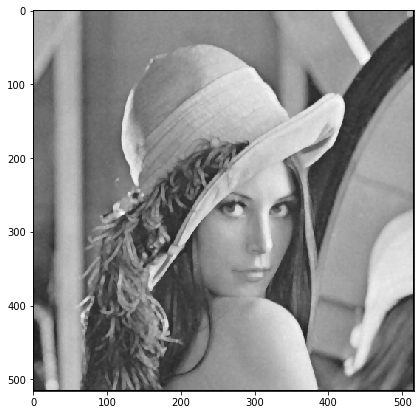

In [53]:
medianFilter(imgNoise, 5)

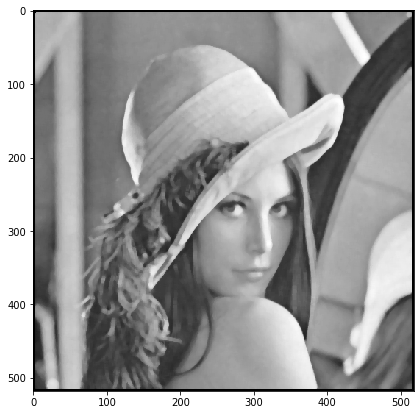

In [54]:
medianFilter(imgNoise, 7)

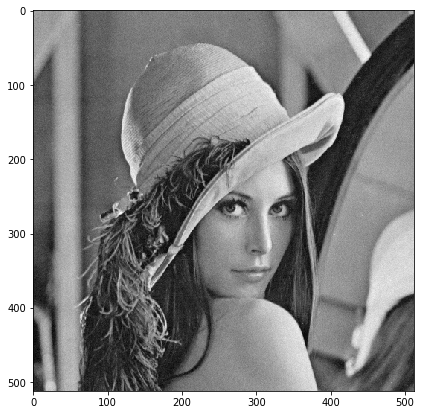

In [55]:
gaussianFilter(imgNoise, 5, 0.1)

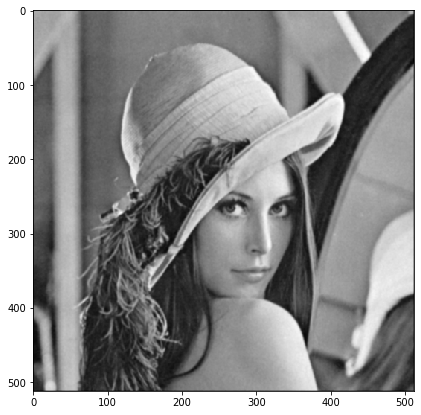

In [56]:
gaussianFilter(imgNoise, 5, 0.9)

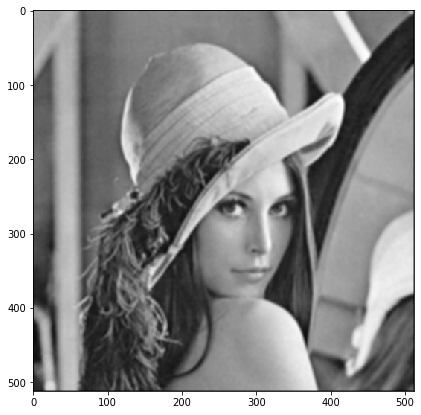

In [57]:
gaussianFilter(imgNoise, 5, 2.5)

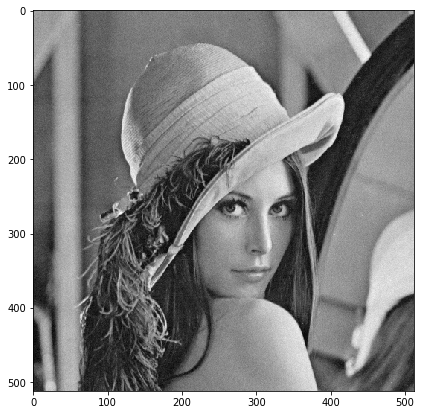

In [58]:
gaussianFilter(imgNoise, 7, 0.1)

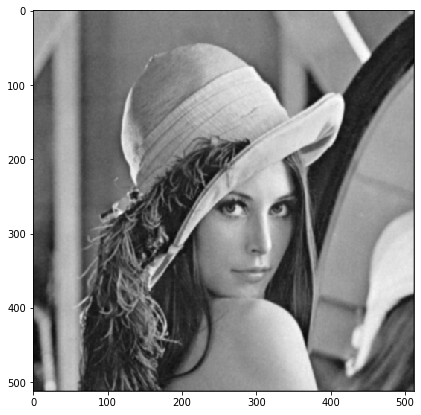

In [59]:
gaussianFilter(imgNoise, 7, 0.9)

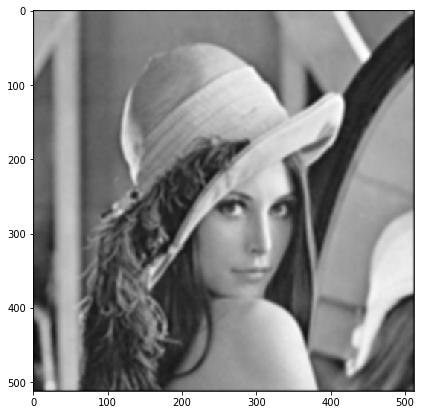

In [60]:
gaussianFilter(imgNoise, 7, 2.5)

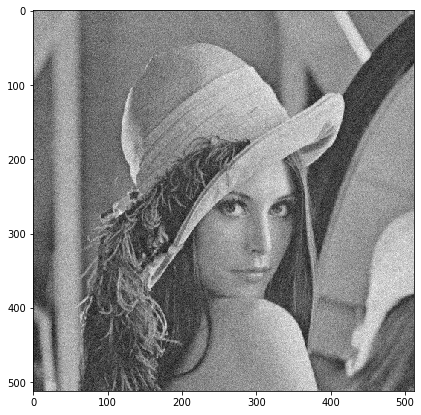

In [80]:
sigma = 15
imgNoise = img + sigma*np.random.randn(*img.shape)
fig1 = plt.figure(figsize = (7,7))
plt.imshow(imgNoise, cmap='gray')

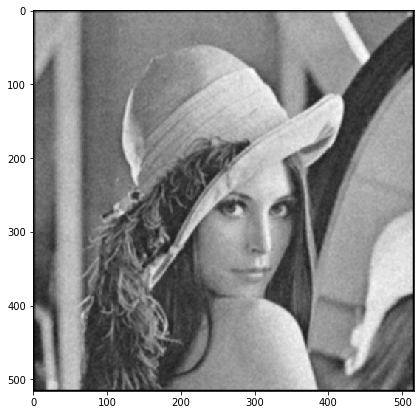

In [81]:
boxFilter(imgNoise, 5)

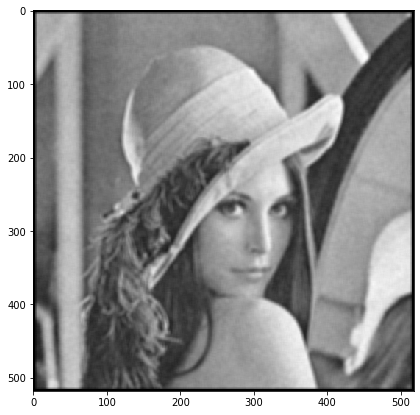

In [82]:
boxFilter(imgNoise, 7)

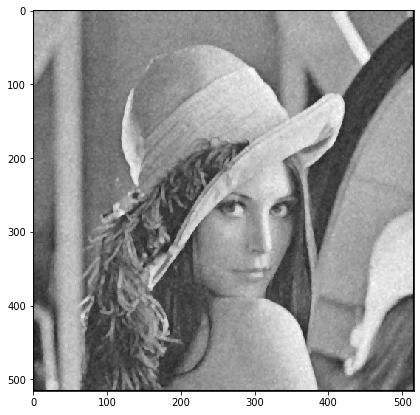

In [83]:
medianFilter(imgNoise, 5)

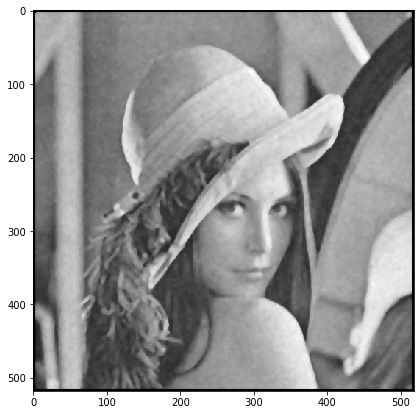

In [84]:
medianFilter(imgNoise, 7)

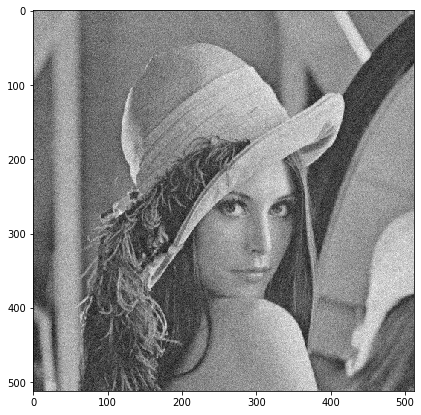

In [85]:
gaussianFilter(imgNoise, 5, 0.1)

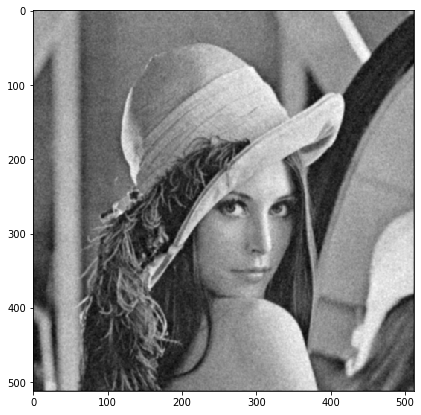

In [86]:
gaussianFilter(imgNoise, 5, 0.9)

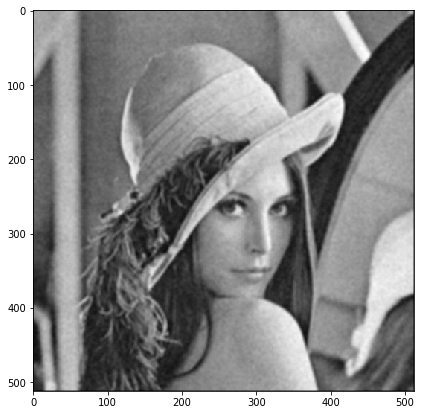

In [87]:
gaussianFilter(imgNoise, 5, 2.5)

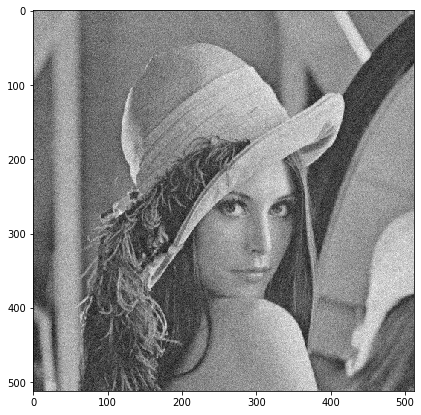

In [88]:
gaussianFilter(imgNoise, 7, 0.1)

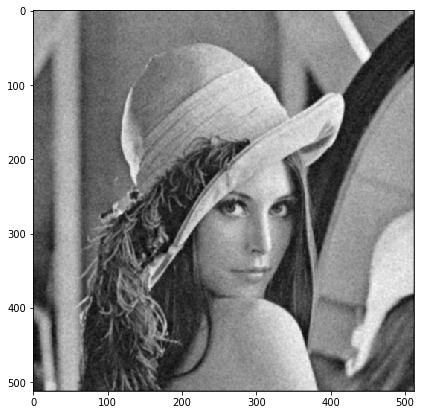

In [89]:
gaussianFilter(imgNoise, 7, 0.9)

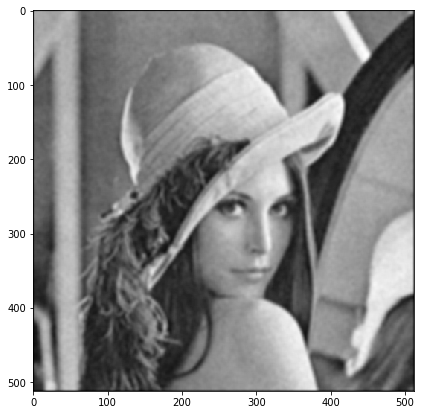

In [90]:
gaussianFilter(imgNoise, 7, 2.5)

#### Derivative Filter

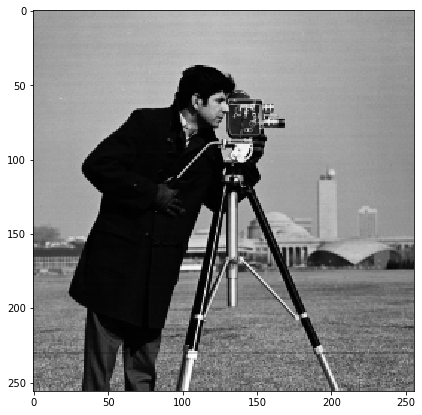

In [212]:
cameraman = io.imread('cameraman.png')
cameraman = rgb2gray(cameraman)
fig1 = plt.figure(figsize = (7,7))
plt.imshow(cameraman, cmap='gray')

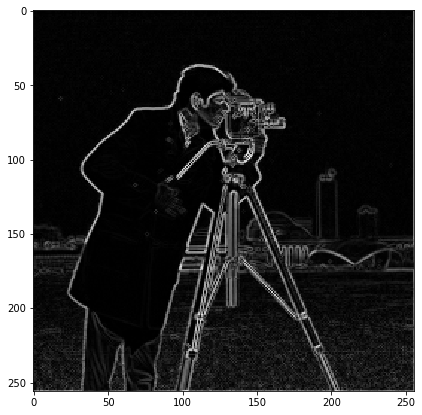

In [215]:
def derivativeFilter(image):
    filterX = np.array([[0, 0, 0],
                        [-1, 0, 1],
                        [0, 0, 0]])
    filterY = np.flip(filterX.T)
    
    xImage = convolution(image, filterX)
    yImage = convolution(image, filterY)
    gradient = np.sqrt(np.square(xImage) + np.square(yImage))
    gradient *= 255.0 / gradient.max()
    fig1 = plt.figure(figsize = (7,7))
    plt.imshow(gradient, cmap='gray')
    
derivativeFilter(cameraman)

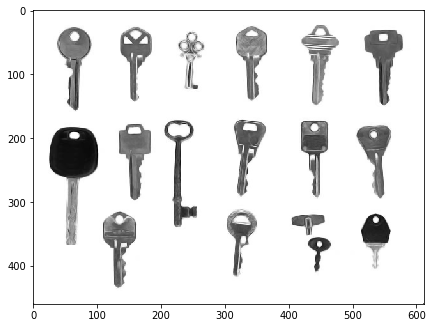

In [339]:
keys = io.imread('multiplekeys.png')
keys = rgb2gray(keys)
keys = keys.astype('float32')
keys = keys / 255.0

fig1 = plt.figure(figsize = (7,7))
plt.imshow(keys, cmap='gray')

In [340]:
def threshold(image):
    height = image.shape[0]
    width = image.shape[1]
    
    for i in range(0, height):
        for j in range(0, width):
            if image[i,j] == 1.0:
                image[i,j] = 0.0
            else:
                image[i,j] = 1.0
    
    return image

thresholdImage = threshold(keys)

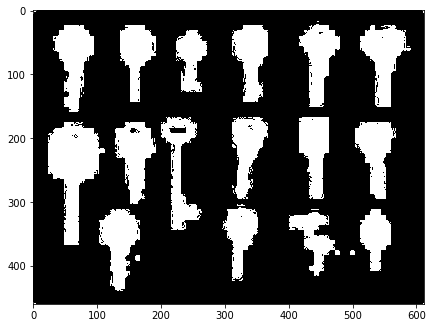

In [341]:
fig1 = plt.figure(figsize = (7,7))
plt.imshow(thresholdImage, cmap='gray')

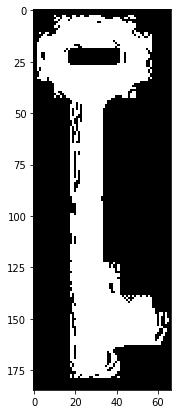

In [342]:
template = thresholdImage[165:350, 198:265]
fig1 = plt.figure(figsize = (7,7))
plt.imshow(template, cmap='gray')

In [343]:
def templateThreshold(image):
    height = image.shape[0]
    width = image.shape[1]
    
    for i in range(0, height):
        for j in range(0, width):
            if image[i,j] == 0.0:
                image[i,j] = -1.0
            else:
                image[i,j] = +1.0
    
    return image

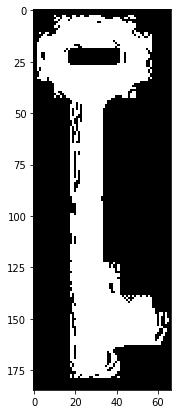

In [344]:
mykeyTemplate = templateThreshold(template)
fig1 = plt.figure(figsize = (7,7))
plt.imshow(mykeyTemplate, cmap='gray')

In [345]:
def crossCorrelation(f, image):
    x = int((f.shape[0] - 1) / 2)
    y = int((f.shape[1] - 1) / 2)
    
    paddedImage = np.zeros((image.shape[0] + f.shape[0] - 1, image.shape[1] + f.shape[1] - 1))
    paddedImage[x:-x, y:-y] = image
    
    convolutedImage = np.zeros_like(image)
    
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            convolutedImage[i,j] = (f * paddedImage[i: i + f.shape[0], j: j + f.shape[1]]).sum()
            
    return convolutedImage

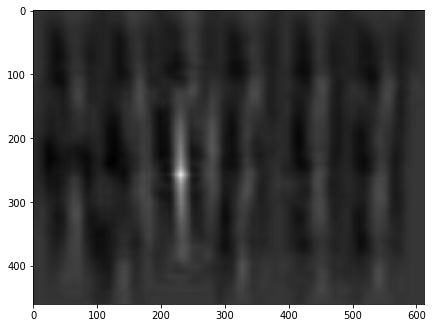

In [346]:
crossCorrelationImage = crossCorrelation(mykeyTemplate, thresholdImage)
fig1 = plt.figure(figsize = (7,7))
plt.imshow(crossCorrelationImage, cmap='gray')